In [32]:
import os

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, set_matplotlib_formats

sns.set_context('talk')

## Load .csv (output of reanalyze.py)

In [33]:
path = '/Users/cudmore/data/laura-ephys/Superior vs Inferior database_master.csv'
df = pd.read_csv(path, header=0) #, dtype={'ABF File': str})
display(df.head())

,Unnamed: 0,file,condition1,condition2,condition3,condition4,spikeNumber,numError,errors,dVthreshold,...,cycleLength_ms,apDuration_ms,diastolicDuration_ms,widths,analysisname,Condition,File Number,Sex,Region,filename
0,0,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,30,0,[],NaN,...,7099.2,161.7,6933.2,"[{'halfHeight': 20, 'risingPnt': 435639, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
1,1,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,31,0,[],NaN,...,383.7,241.0,124.3,"[{'halfHeight': 20, 'risingPnt': 437409, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
2,2,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,32,0,[],NaN,...,213.8,148.2,62.0,"[{'halfHeight': 20, 'risingPnt': 441311, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
3,3,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,33,0,[],NaN,...,466.9,196.5,234.5,"[{'halfHeight': 20, 'risingPnt': 444198, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
4,4,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,34,0,[],NaN,...,735.1,229.4,500.6,"[{'halfHeight': 20, 'risingPnt': 448826, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000


## Within cell mean of any stat

In [34]:
statStr = 'spikeFreq_hz'
statStr = 'earlyDiastolicDurationRate'

print(statStr)
statDf = df.groupby(['Region', 'Sex', 'Condition', 'analysisname'])[statStr].describe();
display(statDf)


earlyDiastolicDurationRate


count        mean  \
Region   Sex    Condition analysisname                                          
Inferior Female ctrl      2020_07_07_0000_s38_09_s48_81      10.0   32.676993   
                          2020_07_07_0004_s16_21_s197_59    129.0   12.636441   
                          2020_07_20_0004_s0_00_s357_73      61.0   45.620060   
         Male   ISO 100nM 2020_07_23_0003_s177_26_s276_67   145.0   44.765471   
                ctrl      2020_06_30_0000_s42_26_s65_75      44.0   62.470328   
                          2020_07_23_0002_s1_19_s67_42       36.0   52.441953   
                          2020_07_23_0003_s7_73_s103_03      92.0   44.456948   
Superior Female ISO 100nM 2020_07_28_0000_s239_50_s275_81   152.0   54.187526   
                          2020_07_30_0000_s226_95_s242_98    84.0  194.888194   
                          2020_07_30_0002_s178_20_s196_54    85.0   42.648084   
                ctrl      2020_06_25_0001_s98_16_s108_62     70.0   97.379945   
                          2020_06_30_0002_s108_23_s196_89   299.0  112.042276   
                          2020_07_07_0001_s709_72_s789_47    44.0   13.048662   
                          2020_07_30_0002_s2_78_s20_25       83.0   64.678121   
                          2020_07_31_0001_s0_00_s371_04    1143.0   86.595569   
         Male   ISO 100nM 2020_07_01_0002_s187_97_s242_81   181.0   88.795016   
                          2020_07_23_0000_s172_05_s210_41   169.0   80.416025   
                          2020_07_23_0001_s309_92_s359_33   179.0   88.974566   
                ctrl      2020_06_23_0006_s70_08_s158_30    370.0   61.338861   
                          2020_06_30_0002_s114_91_s180_38   134.0  119.832684   
                          2020_07_01_0002_s54_80_s104_21    276.0  164.751036   
                          2020_07_16_0004_s1_77_s8_48         5.0    1.330102   
                          2020_07_23_0000_s0_50_s37_13      169.0   81.396431   
                          2020_07_23_0001_s29_30_s103_31    335.0   94.875243   

                                                                 std  \
Region   Sex    Condition analysisname                                 
Inferior Female ctrl      2020_07_07_0000_s38_09_s48_81    54.730447   
                          2020_07_07_0004_s16_21_s197_59   37.665043   
                          2020_07_20_0004_s0_00_s357_73    78.011243   
         Male   ISO 100nM 2020_07_23_0003_s177_26_s276_67  54.860163   
                ctrl      2020_06_30_0000_s42_26_s65_75    55.892457   
                          2020_07_23_0002_s1_19_s67_42     56.866601   
                          2020_07_23_0003_s7_73_s103_03    68.181679   
Superior Female ISO 100nM 2020_07_28_0000_s239_50_s275_81  12.614279   
                          2020_07_30_0000_s226_95_s242_98  51.303313   
                          2020_07_30_0002_s178_20_s196_54  58.231598   
                ctrl      2020_06_25_0001_s98_16_s108_62   28.179685   
                          2020_06_30_0002_s108_23_s196_89  67.192056   
                          2020_07_07_0001_s709_72_s789_47   6.431966   
                          2020_07_30_0002_s2_78_s20_25     39.655817   
                          2020_07_31_0001_s0_00_s371_04    65.237287   
         Male   ISO 100nM 2020_07_01_0002_s187_97_s242_81  74.382001   
                          2020_07_23_0000_s172_05_s210_41  29.814809   
                          2020_07_23_0001_s309_92_s359_33  23.334734   
                ctrl      2020_06_23_0006_s70_08_s158_30   45.327553   
                          2020_06_30_0002_s114_91_s180_38  77.244542   
                          2020_07_01_0002_s54_80_s104_21   48.062149   
                          2020_07_16_0004_s1_77_s8_48       2.995925   
                          2020_07_23_0000_s0_50_s37_13     27.141713   
                          2020_07_23_0001_s29_30_s103_31   29.554241   

                                                                  min  \
Region 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


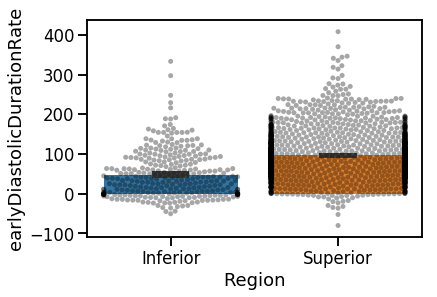

In [31]:

#sns.catplot(data=df, x='Region', y=statStr, hue='Region')

# I want to get the mean per cell and then plot

ax = sns.barplot(x="Region", y=statStr, data=df, ci=68, capsize=0.2)

sns.swarmplot(x="Region", y=statStr, data=df, color="0", alpha=.35)
#sns.stripplot(x="Region", y=statStr, data=df, color="0", alpha=.35)


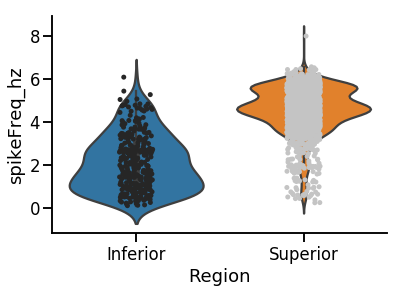

In [7]:
#sns.boxplot(x="Region", y=statStr, kind="box", data=df)

fig, ax = plt.subplots()

g = sns.violinplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                dodge=False,
                ax=ax)
g = sns.stripplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                color = "0.77",
                dodge=False,
                ax=ax)
sns.despine(ax=ax)
#ax.set_ylabel("survival probability")
l = ax.legend()
#l.set_title('Whatever you want')
l.remove()

,spikeFreq_hz_mean,spikeFreq_hz_std,spikeFreq_hz_sem,spikeFreq_hz_count,Region
0,4.606427,1.123359,0.058401,370,Superior
1,2.805839,1.140580,0.098531,134,Superior
2,5.439243,0.875543,0.040956,457,Superior
3,0.733093,0.196936,0.088072,5,Superior
4,4.520101,0.213763,0.011627,338,Superior
5,4.272068,0.652933,0.028800,514,Superior
6,2.522046,1.024555,0.154458,44,Inferior
7,1.344800,0.993525,0.167936,35,Inferior
8,2.145709,1.350214,0.087706,237,Inferior


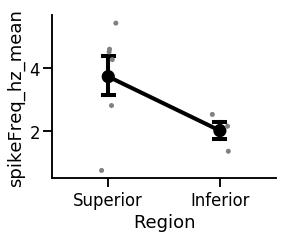

In [8]:
supDf = df [ df['Region']=='Superior' ]
newDf = supDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #.mean()
newDf['Region'] = 'Superior'
newDf.columns = [c if c=='Region' else statStr+'_'+c for c in newDf.columns.to_list()]

infDf = df [ df['Region']=='Inferior' ]
newDf2 = infDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #mean()
newDf2['Region'] = 'Inferior'
newDf2.columns = [c if c=='Region' else statStr+'_'+c for c in newDf2.columns.to_list()]

newDf = newDf.append(newDf2, ignore_index=True)

display(newDf)

fig, ax = plt.subplots(figsize=(4,3))

mStatStr = statStr + '_mean'

sns.stripplot(x='Region', y=mStatStr, data=newDf, color="0.5", ax=ax);
sns.pointplot(x='Region', y=mStatStr, data=newDf, ci=68, capsize=0.1, color='k', ax=ax)
sns.despine()


4.561824449048742 96.45695900924449


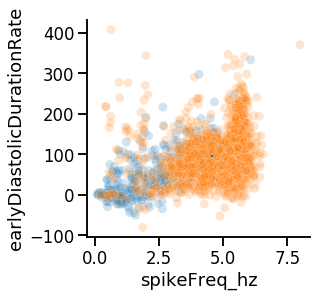

In [9]:
xStat = 'spikeFreq_hz'
yStat = 'earlyDiastolicDurationRate'

fig, ax = plt.subplots(figsize=(4,4))

sns.scatterplot(x=xStat, y=yStat, hue='Region', alpha=0.2, data=df, ax=ax)
#sns.pointplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', hue='Region', ci=68, data=df)
sns.despine()

supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

xList = supDf[xStat].tolist()
xMean = np.nanmean(xList)
xSem = scipy.stats.sem(xList)

yList = supDf[yStat].tolist()
yMean = np.nanmean(yList)
ySem = scipy.stats.sem(yList)

print(xMean, yMean)

ax.errorbar(x=xMean, y=yMean, xerr=xSem, yerr=ySem)

ax.legend().remove()

plt.show()

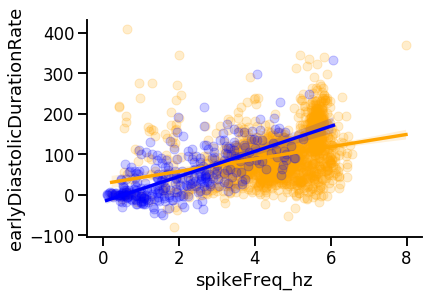

In [10]:
supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='orange', data=supDf, scatter_kws={'alpha':0.2})
sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='blue', data=infDf, scatter_kws={'alpha':0.2})
sns.despine()

In [11]:
df.groupby('filename', as_index=False)['spikeFreq_hz','isi_ms', 'condition1'].mean()

,filename,spikeFreq_hz,isi_ms
0,2020_06_23_0006,4.606427,238.976216
1,2020_06_30_0000,2.522046,674.154545
2,2020_06_30_0002,2.805839,488.191045
3,2020_07_01_0002,5.439243,225.809190
4,2020_07_16_0004,0.733093,1429.280000
5,2020_07_23_0000,4.520101,221.726627
6,2020_07_23_0001,4.272068,240.265759
7,2020_07_23_0002,1.344800,1686.677143
8,2020_07_23_0003,2.145709,802.569198
